# COVID-19 Status (Colombia)

### Importar librerias

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sn

### Importar dataset - Datos abiertos COVID-19 (Colombia)

In [2]:
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())

### Normalización y ajuste de datos

In [3]:
data.columns = ['Id de caso', 'Fecha de diagnóstico', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'País de procedencia']
for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
data['Fecha de diagnóstico'] = data['Fecha de diagnóstico'].apply(lambda x: pd.to_datetime(x, dayfirst=True))
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(float), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])
data = data[['Id de caso', 'Fecha de diagnóstico', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Tipo', 'País de procedencia']]
data = data.set_index('Id de caso')

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/20), height+3, int(height), fontsize=11, color='dimgrey', rotation=30)

### Habilitar Matplotlib

In [4]:
%matplotlib inline

## Análisis Dataset - COVID-19 (Colombia)

### - Datos COVID-19 (Colombia)

In [5]:
data

,Fecha de diagnóstico,Ciudad de ubicación,Departamento,Estado,Edad,Clasificación de edad,Sexo,Tipo,País de procedencia
Id de caso,,,,,,,,,
1,2020-03-06,Bogotá,Bogotá D.C.,Recuperado,19,10 - 20,F,Importado,Italia
2,2020-03-09,Buga,Valle del Cauca,Recuperado,34,30 - 40,M,Importado,España
3,2020-03-09,Medellín,Antioquia,Recuperado,50,40 - 50,F,Importado,España
4,2020-03-11,Medellín,Antioquia,Recuperado,55,50 - 60,M,Relacionado,Colombia
5,2020-03-11,Medellín,Antioquia,Recuperado,25,20 - 30,M,Relacionado,Colombia
...,...,...,...,...,...,...,...,...,...
2050,2020-04-08,Trujillo,Valle del Cauca,Casa,38,30 - 40,F,Importado,Turquía
2051,2020-04-08,Trujillo,Valle del Cauca,Casa,64,60 - 70,M,Importado,Turquía
2052,2020-04-08,Andalucía,Valle del Cauca,Hospital,78,70 - 80,F,En estudio,Colombia


### - Casos confirmados VS Departamento (Sexo)

In [6]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Departamento,,
Antioquia,123.0,111.0
Atlántico,10.0,8.0
Barranquilla D.E.,25.0,24.0
Bogotá D.C.,492.0,500.0
Bolívar,3.0,3.0
Boyacá,9.0,10.0
Caldas,12.0,7.0
Cartagena D.T. y C,36.0,29.0
Casanare,1.0,1.0


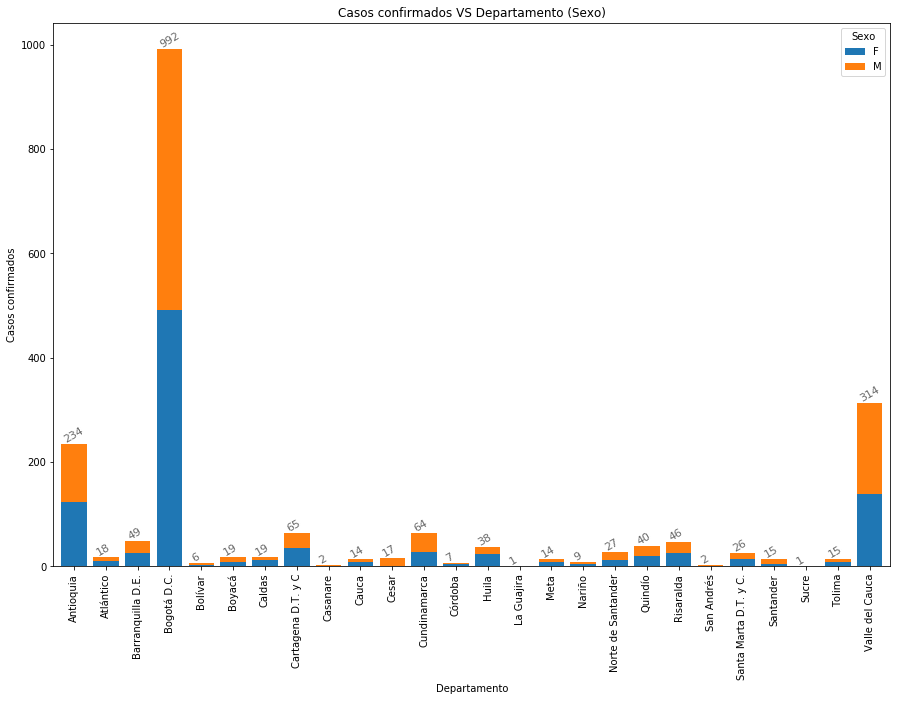

In [7]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_ylabel('Casos confirmados')
div =len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [8]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Departamento,,,,,,,,,,
Antioquia,4,8,55,50,33,53,19,6,4,2
Atlántico,3,2,2,2,6,2,1,0,0,0
Barranquilla D.E.,2,5,15,7,6,6,6,2,0,0
Bogotá D.C.,19,35,197,228,179,146,111,55,18,4
Bolívar,0,0,2,1,1,1,1,0,0,0
Boyacá,1,2,2,2,3,3,2,3,1,0
Caldas,0,2,7,3,1,1,3,0,1,1
Cartagena D.T. y C,0,4,18,12,12,13,1,2,3,0
Casanare,0,0,1,1,0,0,0,0,0,0


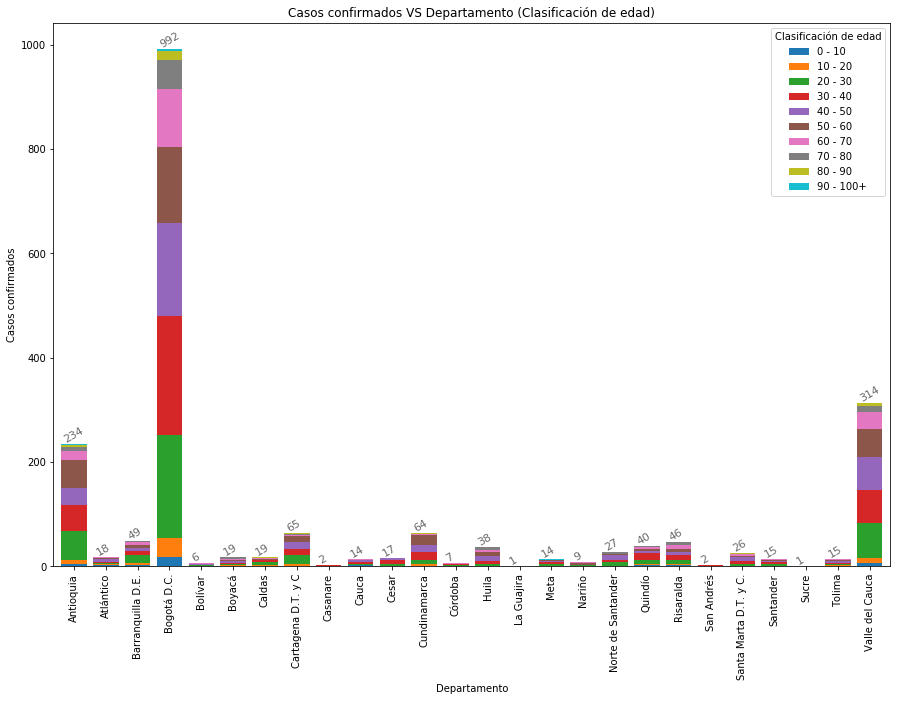

In [9]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Departamento (Estado)

In [10]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado,Casa,Fallecido,Hospital,Hospital uci,Recuperado
Departamento,,,,,
Antioquia,199.0,1.0,16.0,6.0,12.0
Atlántico,16.0,2.0,0.0,0.0,0.0
Barranquilla D.E.,38.0,2.0,2.0,2.0,5.0
Bogotá D.C.,749.0,25.0,114.0,38.0,66.0
Bolívar,6.0,0.0,0.0,0.0,0.0
Boyacá,17.0,1.0,1.0,0.0,0.0
Caldas,16.0,0.0,1.0,0.0,2.0
Cartagena D.T. y C,48.0,3.0,6.0,2.0,6.0
Casanare,1.0,0.0,0.0,0.0,1.0


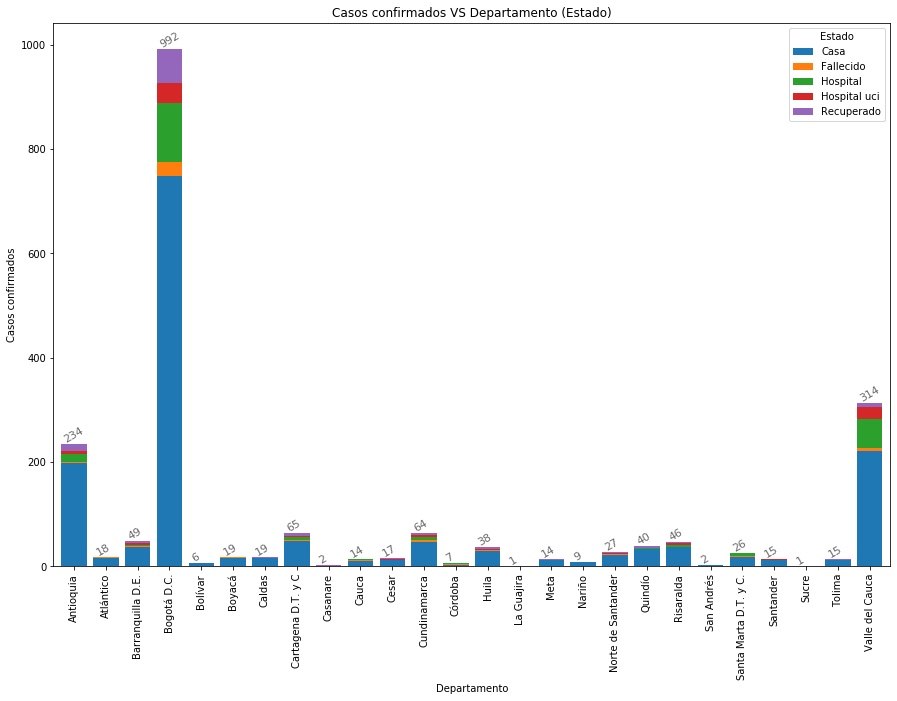

In [11]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [12]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Fecha de diagnóstico,,
2020-03-06,1.0,0.0
2020-03-09,1.0,1.0
2020-03-11,4.0,2.0
2020-03-12,4.0,0.0
2020-03-13,2.0,1.0
2020-03-14,4.0,4.0
2020-03-15,9.0,12.0
2020-03-16,5.0,7.0
2020-03-17,7.0,11.0


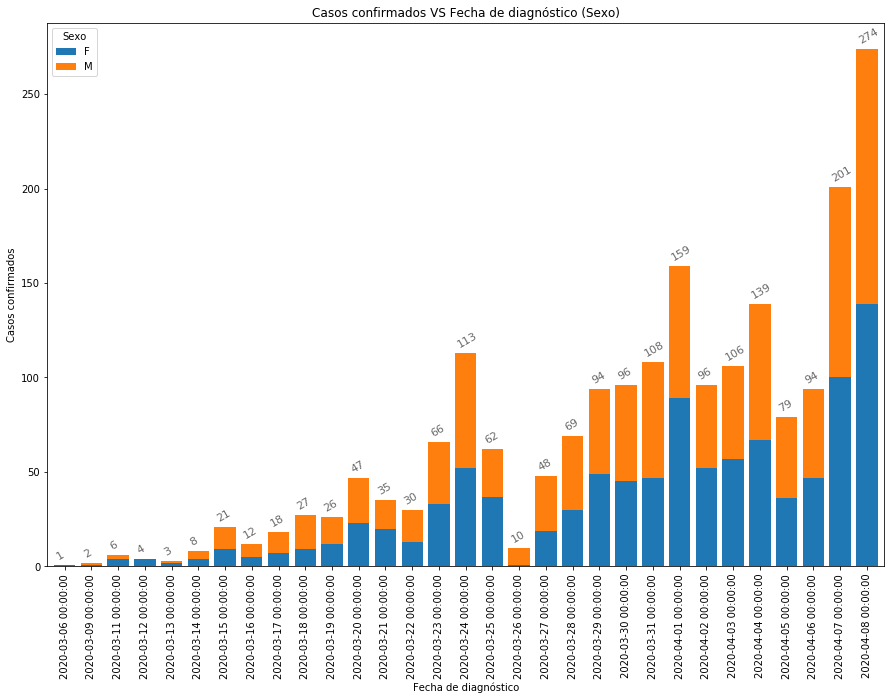

In [13]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div =len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [14]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Fecha de diagnóstico,,,,,,,,,,
2020-03-06,0,1,0,0,0,0,0,0,0,0
2020-03-09,0,0,0,1,1,0,0,0,0,0
2020-03-11,0,0,4,0,0,1,0,0,1,0
2020-03-12,0,0,0,1,1,0,1,1,0,0
2020-03-13,0,0,1,0,1,0,1,0,0,0
2020-03-14,0,1,3,1,0,2,0,1,0,0
2020-03-15,0,0,9,0,3,5,1,3,0,0
2020-03-16,0,0,2,4,3,1,2,0,0,0
2020-03-17,0,2,7,4,1,2,1,1,0,0


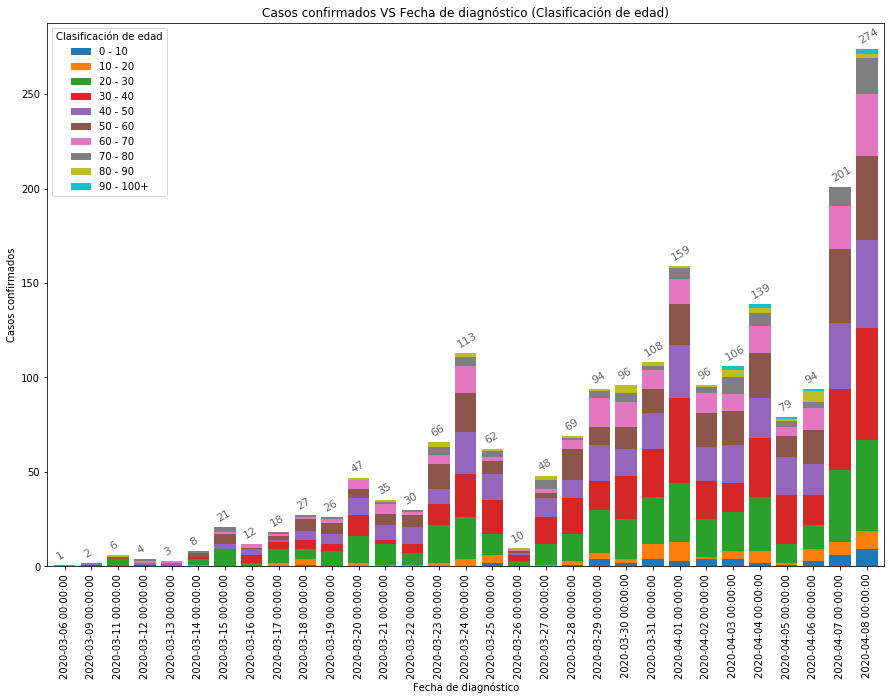

In [15]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [16]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado,Casa,Fallecido,Hospital,Hospital uci,Recuperado
Fecha de diagnóstico,,,,,
2020-03-06,0.0,0.0,0.0,0.0,1.0
2020-03-09,0.0,0.0,0.0,0.0,2.0
2020-03-11,1.0,0.0,0.0,0.0,5.0
2020-03-12,3.0,0.0,0.0,0.0,1.0
2020-03-13,0.0,0.0,0.0,0.0,3.0
2020-03-14,2.0,0.0,0.0,0.0,6.0
2020-03-15,4.0,0.0,1.0,0.0,16.0
2020-03-16,4.0,0.0,0.0,0.0,8.0
2020-03-17,11.0,0.0,0.0,1.0,6.0


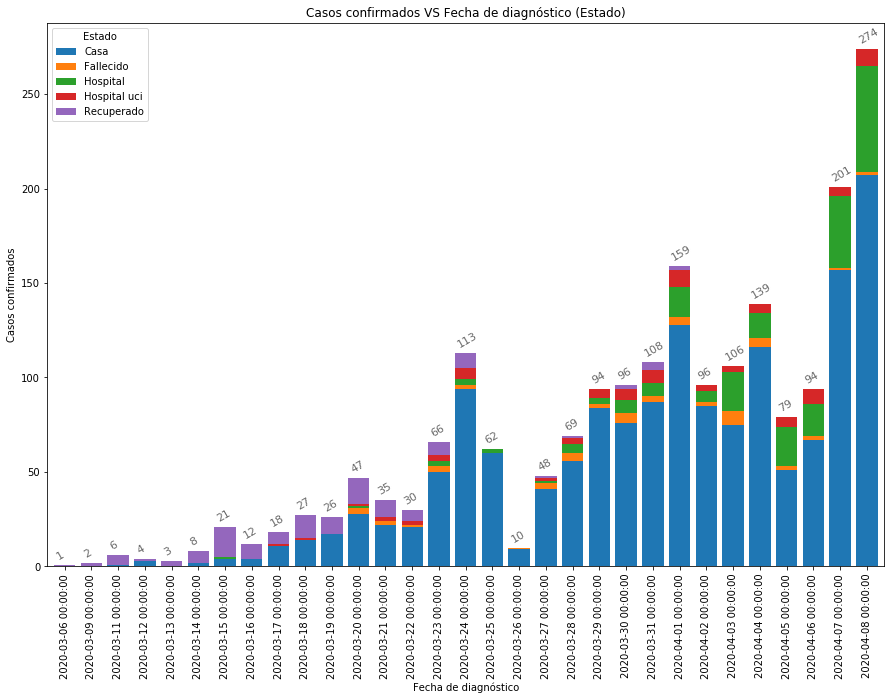

In [17]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados VS Estado (Sexo)

In [18]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Estado,,
Casa,815,755
Fallecido,24,30
Hospital,77,144
Hospital uci,33,53
Recuperado,65,58


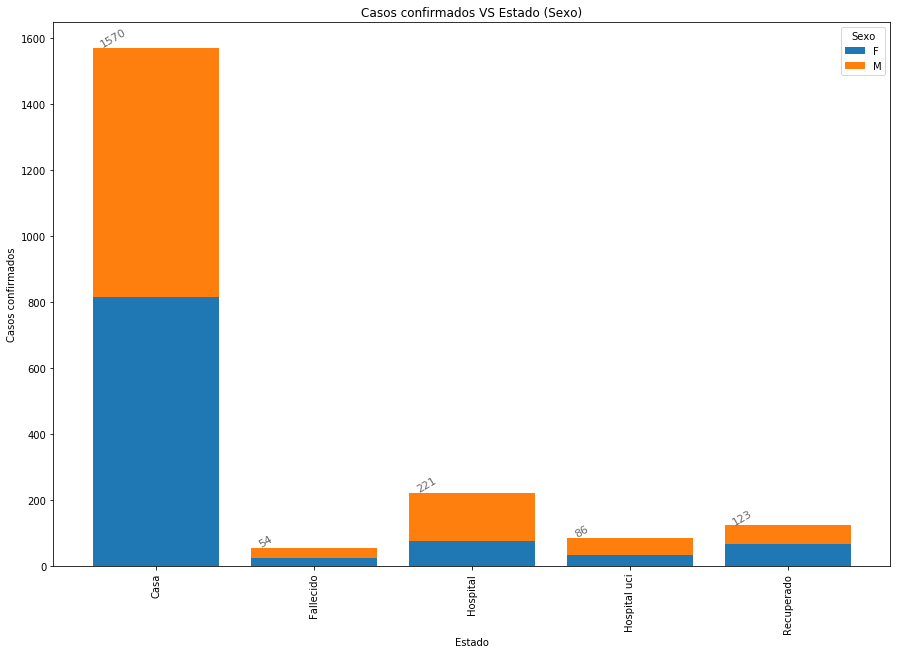

In [19]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_ylabel('Casos confirmados')
div =len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [20]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Estado,,,,,,,,,,
Casa,42,72,374,379,274,243,128,43,13,2
Fallecido,1,1,2,5,4,6,12,12,9,2
Hospital,2,4,20,29,46,46,35,23,11,5
Hospital uci,0,0,5,8,15,18,21,16,3,0
Recuperado,1,5,29,23,29,17,12,5,2,0


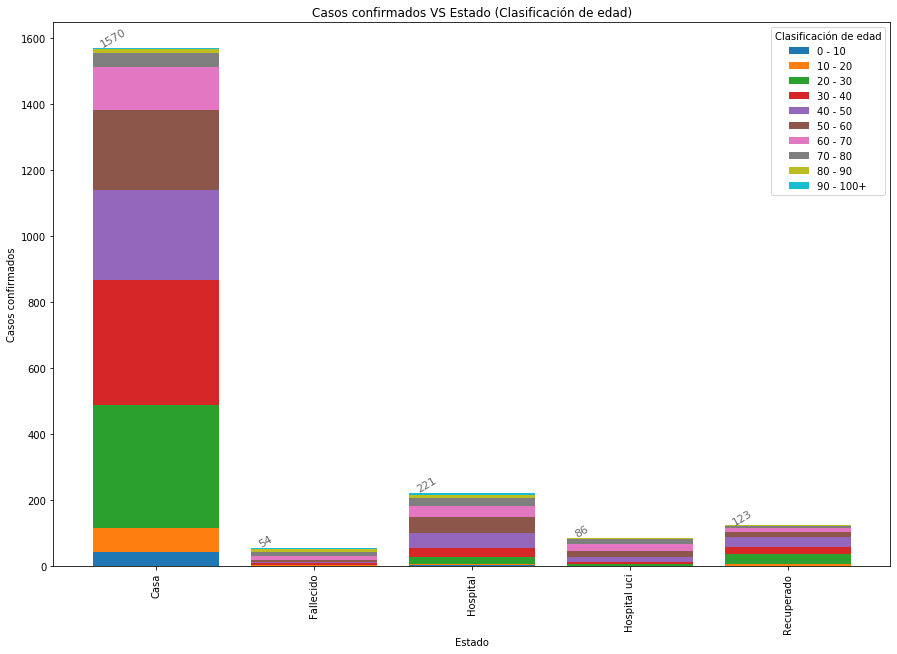

In [21]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [22]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Tipo,,
En estudio,363,383
Importado,328,364
Relacionado,323,293


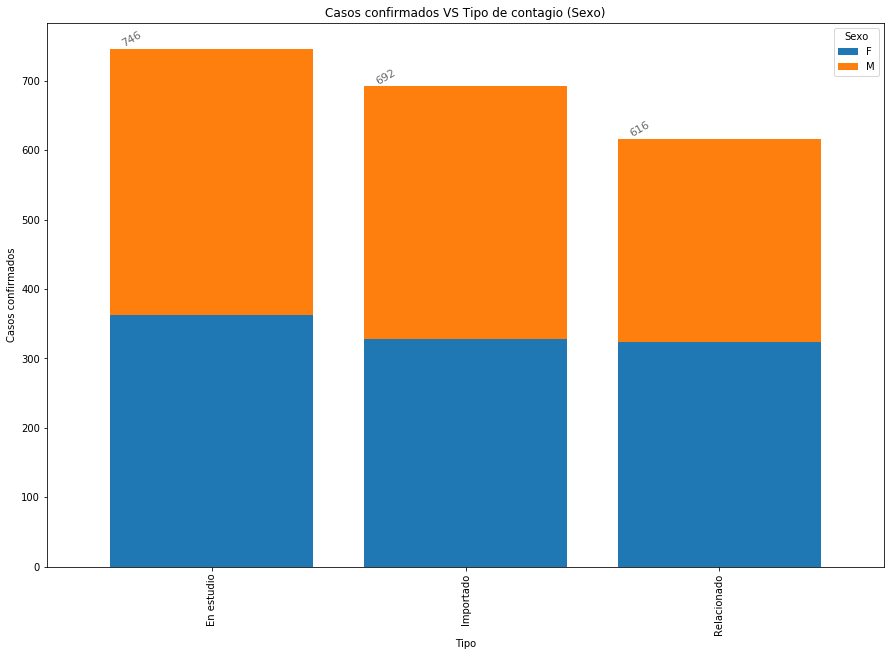

In [23]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_ylabel('Casos confirmados')
div =len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [24]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Tipo,,,,,,,,,,
En estudio,22,34,131,145,141,123,77,48,18,7
Importado,4,23,169,151,121,114,75,25,9,1
Relacionado,20,25,130,148,106,93,56,26,11,1


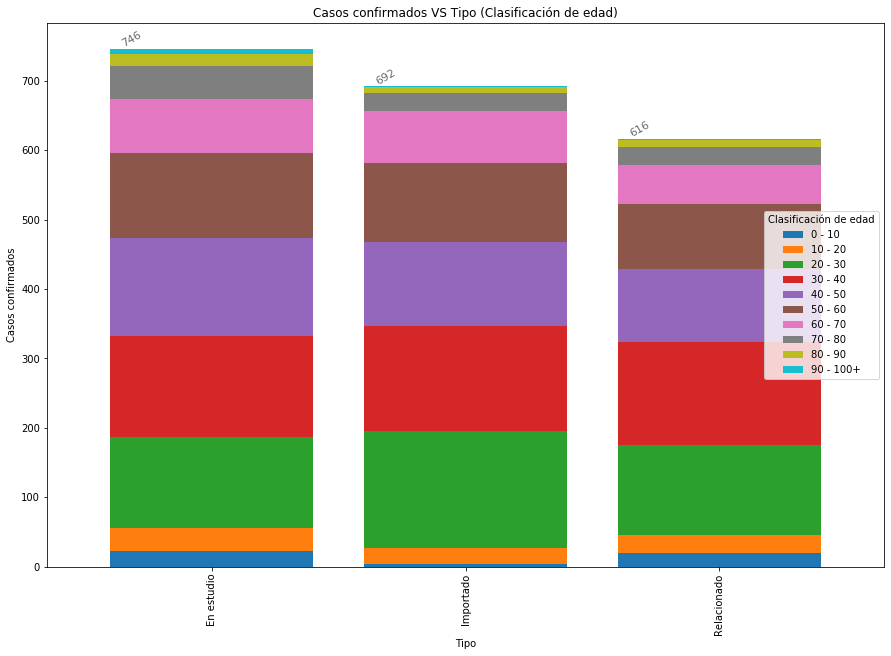

In [25]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [26]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Clasificación de edad,,
0 - 10,24,22
10 - 20,36,46
20 - 30,223,207
30 - 40,219,225
40 - 50,186,182
50 - 60,151,179
60 - 70,105,103
70 - 80,46,53
80 - 90,17,21


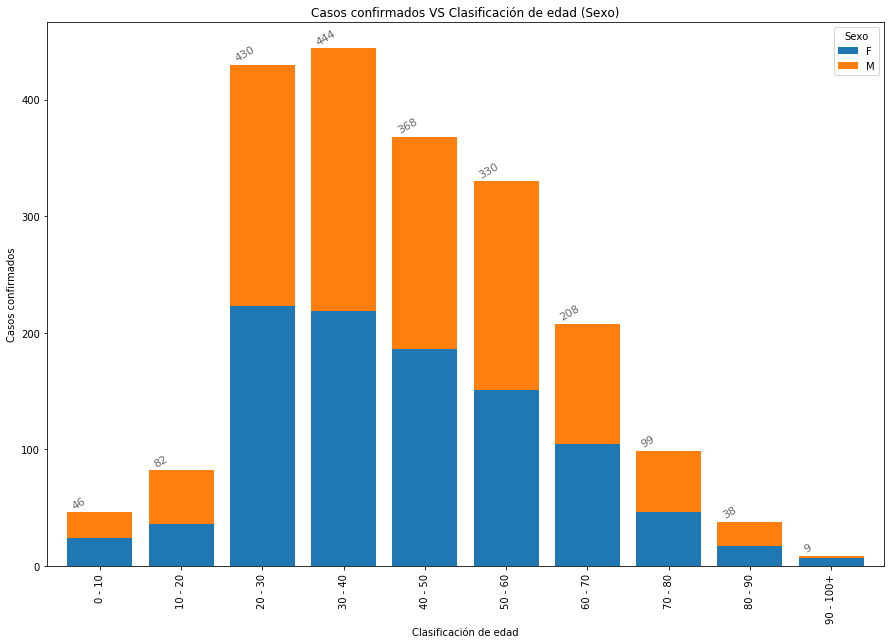

In [27]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_ylabel('Casos confirmados')
div =len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [28]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado,Casa,Fallecido,Hospital,Hospital uci,Recuperado
Clasificación de edad,,,,,
0 - 10,42,1,2,0,1
10 - 20,72,1,4,0,5
20 - 30,374,2,20,5,29
30 - 40,379,5,29,8,23
40 - 50,274,4,46,15,29
50 - 60,243,6,46,18,17
60 - 70,128,12,35,21,12
70 - 80,43,12,23,16,5
80 - 90,13,9,11,3,2


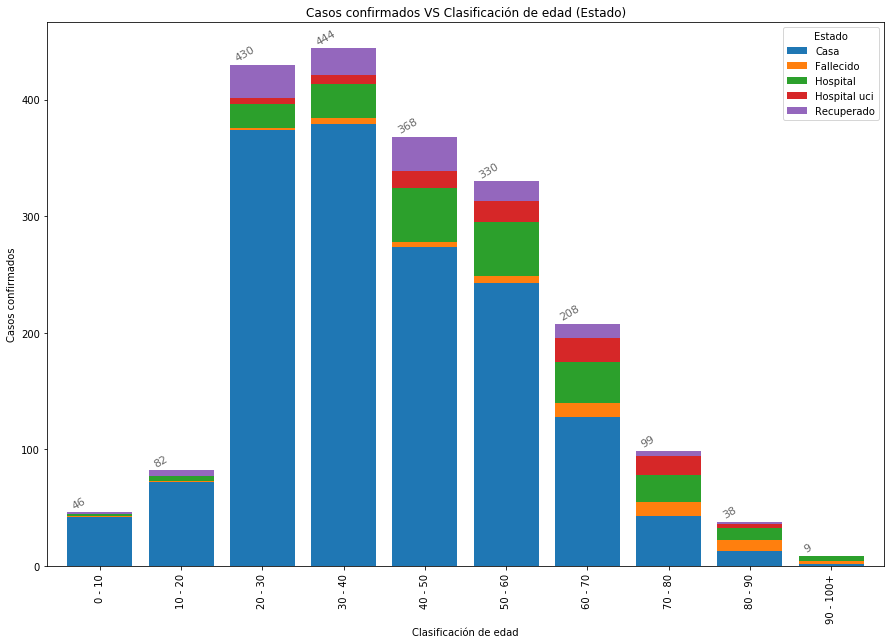

In [29]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().fillna(0)

Sexo,F,M
Fecha de diagnóstico,,
2020-03-06,1.0,0.0
2020-03-09,2.0,1.0
2020-03-11,6.0,3.0
2020-03-12,10.0,3.0
2020-03-13,12.0,4.0
2020-03-14,16.0,8.0
2020-03-15,25.0,20.0
2020-03-16,30.0,27.0
2020-03-17,37.0,38.0


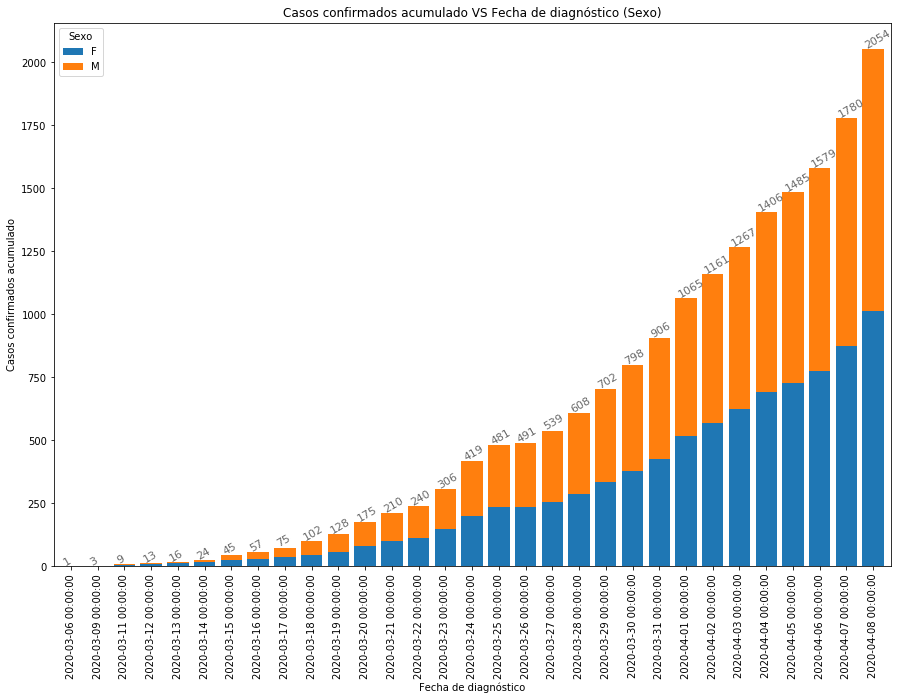

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div =len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Fecha de diagnóstico,,,,,,,,,,
2020-03-06,0,1,0,0,0,0,0,0,0,0
2020-03-09,0,1,0,1,1,0,0,0,0,0
2020-03-11,0,1,4,1,1,1,0,0,1,0
2020-03-12,0,1,4,2,2,1,1,1,1,0
2020-03-13,0,1,5,2,3,1,2,1,1,0
2020-03-14,0,2,8,3,3,3,2,2,1,0
2020-03-15,0,2,17,3,6,8,3,5,1,0
2020-03-16,0,2,19,7,9,9,5,5,1,0
2020-03-17,0,4,26,11,10,11,6,6,1,0


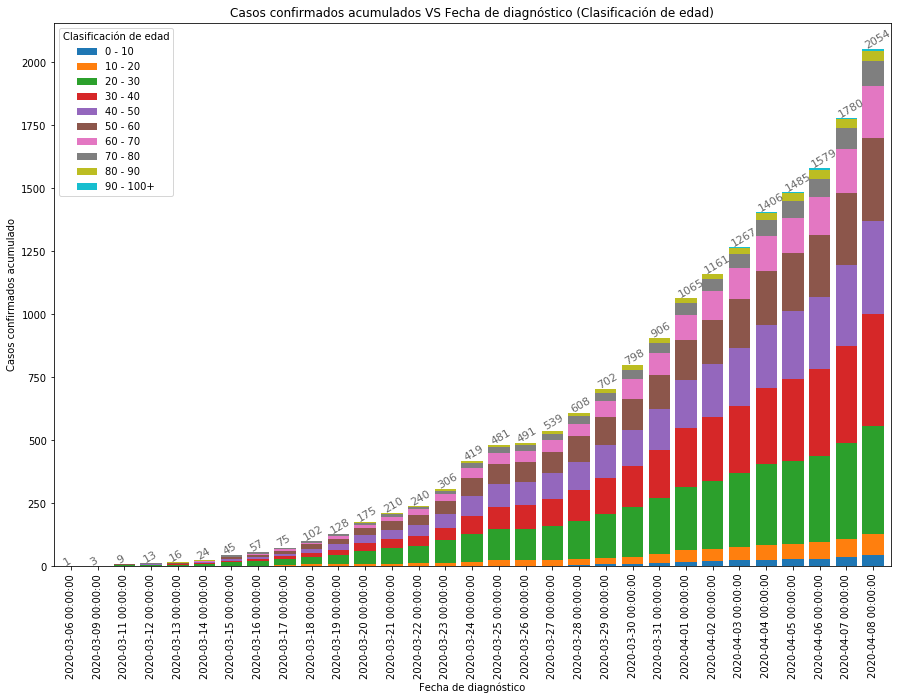

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado,Casa,Fallecido,Hospital,Hospital uci,Recuperado
Fecha de diagnóstico,,,,,
2020-03-06,0.0,0.0,0.0,0.0,1.0
2020-03-09,0.0,0.0,0.0,0.0,3.0
2020-03-11,1.0,0.0,0.0,0.0,8.0
2020-03-12,4.0,0.0,0.0,0.0,9.0
2020-03-13,4.0,0.0,0.0,0.0,12.0
2020-03-14,6.0,0.0,0.0,0.0,18.0
2020-03-15,10.0,0.0,1.0,0.0,34.0
2020-03-16,14.0,0.0,1.0,0.0,42.0
2020-03-17,25.0,0.0,1.0,1.0,48.0


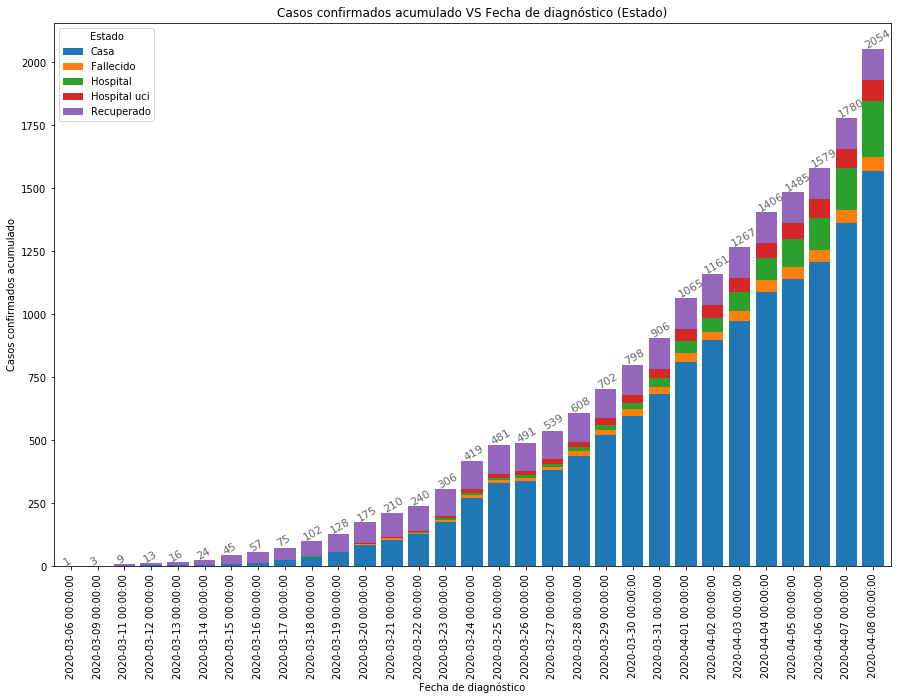

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)